In [ ]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

[Learn the Basics](intro.html) \|\|
[Quickstart](quickstart_tutorial.html) \|\|
[Tensors](tensorqs_tutorial.html) \|\| **Datasets & DataLoaders** \|\|
[Transforms](transforms_tutorial.html) \|\| [Build
Model](buildmodel_tutorial.html) \|\|
[Autograd](autogradqs_tutorial.html) \|\|
[Optimization](optimization_tutorial.html) \|\| [Save & Load
Model](saveloadrun_tutorial.html)

Datasets & DataLoaders
======================


Code for processing data samples can get messy and hard to maintain; we
ideally want our dataset code to be decoupled from our model training
code for better readability and modularity. PyTorch provides two data
primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset`
that allow you to use pre-loaded datasets as well as your own data.
`Dataset` stores the samples and their corresponding labels, and
`DataLoader` wraps an iterable around the `Dataset` to enable easy
access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such
as FashionMNIST) that subclass `torch.utils.data.Dataset` and implement
functions specific to the particular data. They can be used to prototype
and benchmark your model. You can find them here: [Image
Datasets](https://pytorch.org/vision/stable/datasets.html), [Text
Datasets](https://pytorch.org/text/stable/datasets.html), and [Audio
Datasets](https://pytorch.org/audio/stable/datasets.html)


Loading a Dataset
=================

Here is an example of how to load the
[Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/)
dataset from TorchVision. Fashion-MNIST is a dataset of Zalando's
article images consisting of 60,000 training examples and 10,000 test
examples. Each example comprises a 28×28 grayscale image and an
associated label from one of 10 classes.

We load the [FashionMNIST Dataset](https://pytorch.org/vision/stable/datasets.html#fashion-mnist) with the following parameters:

:   -   `root` is the path where the train/test data is stored,
    -   `train` specifies training or test dataset,
    -   `download=True` downloads the data from the internet if it\'s
        not available at `root`.
    -   `transform` and `target_transform` specify the feature and label
        transformations


In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:09<00:00, 2711876.10it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 202239.90it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3799261.25it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6282303.46it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Iterating and Visualizing the Dataset
=====================================

We can index `Datasets` manually like a list: `training_data[index]`. We
use `matplotlib` to visualize some samples in our training data.


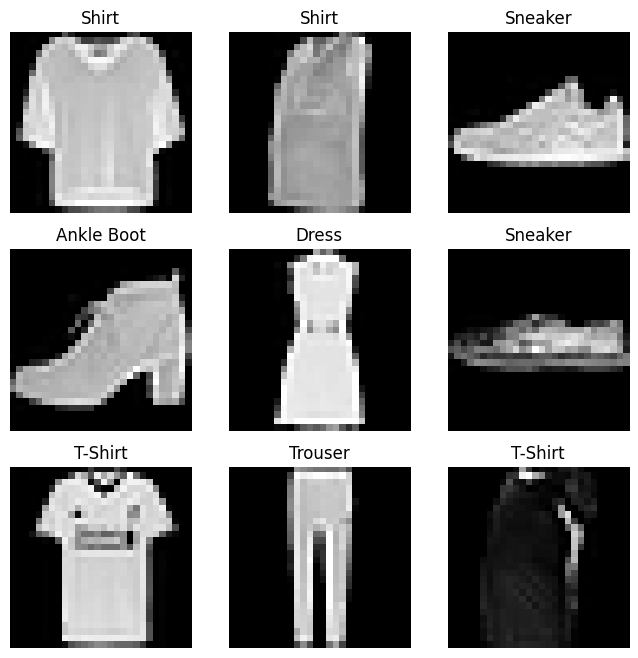

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

------------------------------------------------------------------------


Creating a Custom Dataset for your files
========================================

A custom Dataset class must implement three functions:
[\_\_init\_\_]{.title-ref}, [\_\_len\_\_]{.title-ref}, and
[\_\_getitem\_\_]{.title-ref}. Take a look at this implementation; the
FashionMNIST images are stored in a directory `img_dir`, and their
labels are stored separately in a CSV file `annotations_file`.

In the next sections, we\'ll break down what\'s happening in each of
these functions.


In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset): #kế thừa dataset của torch
     # hàm xác định lấy dữ liệu từ đâu
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

   # trả về số lượng mẫu
    def __len__(self):
        return len(self.img_labels)
 # Cách đọc ảnh
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

`__init__`
==========

The \_\_[init]() function is run once when instantiating the Dataset
object. We initialize the directory containing the images, the
annotations file, and both transforms (covered in more detail in the
next section).

The labels.csv file looks like: :

    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9


In [ ]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

`__len__`
=========

The \_\_[len]() function returns the number of samples in our dataset.

Example:


In [ ]:
def __len__(self):
    return len(self.img_labels)

`__getitem__`
=============

The \_\_[getitem]() function loads and returns a sample from the dataset
at the given index `idx`. Based on the index, it identifies the image\'s
location on disk, converts that to a tensor using `read_image`,
retrieves the corresponding label from the csv data in
`self.img_labels`, calls the transform functions on them (if
applicable), and returns the tensor image and corresponding label in a
tuple.


In [ ]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

------------------------------------------------------------------------


Preparing your data for training with DataLoaders
=================================================

The `Dataset` retrieves our dataset\'s features and labels one sample at
a time. While training a model, we typically want to pass samples in
\"minibatches\", reshuffle the data at every epoch to reduce model
overfitting, and use Python\'s `multiprocessing` to speed up data
retrieval.

`DataLoader` is an iterable that abstracts this complexity for us in an
easy API.


In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=128, shuffle=True)

Iterate through the DataLoader
==============================

We have loaded that dataset into the `DataLoader` and can iterate
through the dataset as needed. Each iteration below returns a batch of
`train_features` and `train_labels` (containing `batch_size=64` features
and labels respectively). Because we specified `shuffle=True`, after we
iterate over all batches the data is shuffled (for finer-grained control
over the data loading order, take a look at
[Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler)).


Feature batch shape: torch.Size([128, 1, 28, 28])
Labels batch shape: torch.Size([128])


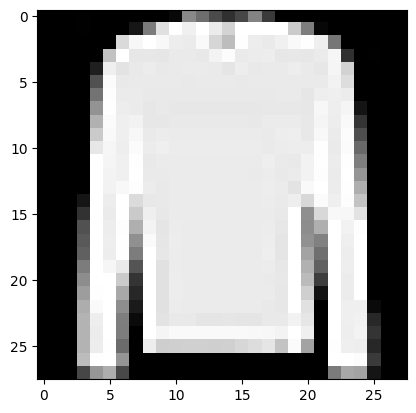

Label: 2


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

------------------------------------------------------------------------


Further Reading
===============

-   [torch.utils.data API](https://pytorch.org/docs/stable/data.html)


Define Model

In [ ]:
import torch
import torch.nn as nn #nearul net
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # input 1 channel, output 6 channel, kernel size 3*3
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(16, 32, 5, padding=2)

        self.fc1 = nn.Linear(7*7*32, 128)  # 14*14 from image dimension
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # Flatten to vector to input the neural network
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [ ]:
net = Net()
net.to(device)
print(net)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

In [ ]:
# Test
def test(model, loss_fn, test_data):
    test_loss = 0
    test_acc = 0
    model.eval()
    with torch.no_grad():
        for batch in test_data:
            x, y = batch
            x = x.to(device)
            y = y.to(device)
            y_hat = model(x)
            test_loss += loss_fn(y_hat, y).item()
            test_acc += (y_hat.argmax(1) == y).sum().item()

    test_loss /= len(test_data)
    test_acc /= len(test_data)
    return test_loss, test_acc

In [ ]:
# Hàm training
def training_loop(n_epochs, optimizer, model, loss_fn, train_data, test_data):
    losses = []
    test_losses = []
    test_accuracy = []
    iters = 0
    for epoch in range(1, n_epochs + 1):
      for batch in train_data:
        iters += 1
        x, y = batch
        x = x.to(device)
        y = y.to(device)
        y_hat = model(x)
        loss = loss_fn(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if iters % 100 == 0:
          print('iters %d, Loss %f' % (iters, float(loss)))
      losses.append(loss.item())
      test_loss, test_acc = test(model, loss_fn, test_data)
      test_losses.append(test_loss)
      test_accuracy.append(test_acc)
      print('epoch %d, Loss %f' % (epoch, float(loss)))
      print('test_loss %f, test_acc %f' % (test_loss, test_acc))
    return losses, test_losses, test_accuracy

In [ ]:
loss, test_loss, test_accuracy = training_loop(
  n_epochs = 5,
  optimizer = optimizer,
  model = net,
  loss_fn = loss_fn,
  train_data = train_dataloader,
  test_data = test_dataloader
)

iters 100, Loss 2.300665
iters 200, Loss 2.288508
iters 300, Loss 2.293421
iters 400, Loss 2.281853
epoch 1, Loss 2.273161
test_loss 2.274160, test_acc 31.911392
iters 500, Loss 2.268850
iters 600, Loss 2.261418
iters 700, Loss 2.240470
iters 800, Loss 2.239711
iters 900, Loss 2.219563
epoch 2, Loss 2.197676
test_loss 2.205538, test_acc 44.987342
iters 1000, Loss 2.193749
iters 1100, Loss 2.176208
iters 1200, Loss 2.114240
iters 1300, Loss 2.021430
iters 1400, Loss 1.937328
epoch 3, Loss 1.942853
test_loss 1.947748, test_acc 63.772152
iters 1500, Loss 1.838017
iters 1600, Loss 1.676841
iters 1700, Loss 1.530146
iters 1800, Loss 1.263893
epoch 4, Loss 1.233709
test_loss 1.295489, test_acc 78.379747
iters 1900, Loss 1.196779
iters 2000, Loss 1.170755
iters 2100, Loss 1.065956
iters 2200, Loss 1.026609
iters 2300, Loss 1.010640
epoch 5, Loss 1.116202
test_loss 0.987498, test_acc 83.468354


Text(0, 0.5, 'loss')

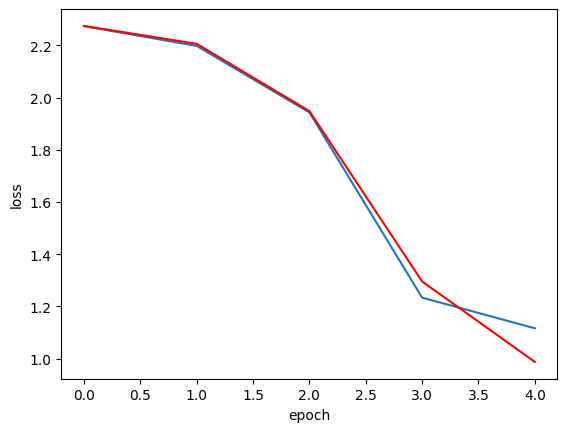

In [ ]:
plt.plot(loss, label="train loss")
plt.plot(test_loss, color='red', label="test loss")
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
net.state_dict().keys()
#lưu tên và trọng số của model

odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])

In [ ]:
torch.save(net.state_dict(), "model.pth")


In [ ]:
net=
net.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>